In [6]:
import pandas as pd
import numpy as np

In [7]:
path = 'E:/my_courses/data mining/project/data_genre/'
path = 'C:/Users/User/Downloads/xxx/book_recom-main/'

In [8]:
rating = pd.read_csv(path + 'ratings.csv')
to_read = pd.read_csv(path + 'to_read.csv')
book = pd.read_csv(path + 'books.csv')

# 2️⃣ Data Preparation Phase : Section 1
<hr style="border:2px solid gray"> </hr>

## 📑 Outlier detection

<div style="", align="justify"><h3>
⚫ checking book dataset outliers
<hr style="border:1px solid gray">

In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

### ✅ Checking outliers of language_code :  Language_codes must be valid

In [5]:
print(list(book['language_code'].unique()))

['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara', 'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur', 'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus']


<div style="color:red", align="justify"><h4>
📌 There isn't any outlier value in language_code column

(eng : English)
(en-US : English as used in the United States)
(spa :  Spanish)
(en - GB : English as used in United Kingdom)
(fre : French)
(nl : Dutch)
(ara : Arabic)
(por : Portuguese)
(ger : German)
(nor : Norwegian)
(jpn : Japanese)
(en : English)
(vie : Vietnamese)
(ind : Indonesian)
(pol : Polish)
(tur : Turkish)
(dan : Danish)
(fil : Filipino)
(ita : Italian)
(per : Persian)
(swe : Swedish)
(rum : Romanian)
(mul : multiple languages)
(rus : Russian)
    
https://www.science.co.il/language/Codes.php

### ✅ Checking outliers of original_publication_year : Original_publication_year must be less than 2021

In [11]:
print('There is {} book with publication year > 2021'.format(len(book[book['original_publication_year'] > 2021])))

There is 0 book with publication year > 2021


In [6]:
print(list(book['original_publication_year'].unique()))

[2008.0, 1997.0, 2005.0, 1960.0, 1925.0, 2012.0, 1937.0, 1951.0, 2000.0, 1813.0, 2003.0, 2011.0, 1949.0, 1945.0, 1947.0, 2009.0, 1999.0, 1954.0, 2010.0, 2002.0, 1998.0, 2007.0, 1595.0, 1988.0, 1993.0, 1950.0, 1996.0, 2006.0, 1868.0, 1847.0, 2001.0, 1953.0, 1974.0, 1979.0, 1932.0, 1884.0, 1952.0, 2015.0, 1995.0, 2004.0, 1969.0, 1936.0, 1985.0, 1818.0, 1977.0, 1811.0, -720.0, 1946.0, 1859.0, 1990.0, 1964.0, 1989.0, 1958.0, 1973.0, 1967.0, 1911.0, 1891.0, 1897.0, 1963.0, 1844.0, 2013.0, 1862.0, 1961.0, 1876.0, 1962.0, 1955.0, 1991.0, 1600.0, 1965.0, 1939.0, 1908.0, 1850.0, 2014.0, 1606.0, 1860.0, 1942.0, 1978.0, 1815.0, 1877.0, 1986.0, 1866.0, 1922.0, 1987.0, 1851.0, 1982.0, 1843.0, 1976.0, 1994.0, 1915.0, 1956.0, nan, 1980.0, 1865.0, 1817.0, 1957.0, 1926.0, 1943.0, 1938.0, 1966.0, 1981.0, 2016.0, 1992.0, 1984.0, 1972.0, 1882.0, 1895.0, 1899.0, 1983.0, -750.0, 1900.0, 1975.0, 1971.0, 1603.0, 1929.0, 1968.0, 1838.0, 1903.0, 1886.0, 1940.0, -500.0, 1887.0, 1931.0, 1611.0, 1814.0, 1719.0, 15

<div style="color:red", align="justify"><h4>
📌 There is some negative values in original_publication_year column. Outlier values or not?
<div style="color:green", align="justify"><h4>
✔️ Negative original_publication_year referes to BC. authors such as Homer, Plato, Aristotle, Sophocles, ...

In [7]:
book[book['original_publication_year'] < 0].head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
78,79,1381,1381,3356006,1703,143039954,9.780143e+12,"Homer, Robert Fagles, E.V. Rieu, Frédéric Mugl...",-720.0,Ὀδύσσεια,...,670326,710757,8101,29703,65629,183082,224120,208223,https://images.gr-assets.com/books/1390173285m...,https://images.gr-assets.com/books/1390173285s...
340,341,1371,1371,3293141,1726,140275363,9.780140e+12,"Homer, Robert Fagles, Frédéric Mugler, Bernard...",-750.0,Ἰλιάς,...,241088,273565,4763,7701,20845,68844,89384,86791,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
402,403,10534,10534,3200649,1865,1590302257,9.781590e+12,"Sun Tzu, Thomas Cleary",-500.0,孫子兵法 [Sūnzi bīngfǎ],...,167332,203948,6335,2930,11589,48265,70644,70520,https://images.gr-assets.com/books/1453417993m...,https://images.gr-assets.com/books/1453417993s...
771,772,30289,30289,1625515,842,140449140,9.780140e+12,"Plato, Desmond Lee",-380.0,Πολιτεία,...,110274,122747,2261,2772,7531,29394,42284,40766,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
823,824,1554,1554,3098166,498,1580495931,9.781580e+12,"Sophocles, J.E. Thomas",-430.0,Οἰδίπους Τύραννος,...,119496,134384,2129,3032,12324,42020,45436,31572,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


### ✅ Checking outliers of average_rating : Average rating must be in range 1 to 5 

<div style="color:red", align="justify"><h4>
📌 There isn't any outlier value in average-rating column

In [8]:
print('Average rating differ from {} to {}'.format(book['average_rating'].min(), book['average_rating'].max()))

Average rating differ from 2.47 to 4.82


### ✅ Checking outliers of isbn13 : Validation of isbn13 using pyisbn library

In [11]:
import sys
from isbntools.app import *
import pyisbn
import time

In [12]:
valid_isbn13 = []
invalid_isbn13 = []

for i in range (len(book)):
    try:
        if pyisbn.validate(str(int(book.loc[i].isbn13))) != True:
            invalid_isbn13.append(i)   
        else:
            valid_isbn13.append(i)
    except:
            invalid_isbn13.append(i)

<div style="color:red", align="justify"><h4>
📌 There is some outlier value in isbn13 column
<div style="color:green", align="justify"><h4>
✔️ We use isbntool and pyisbn to imputing correct isbn13

In [13]:
print('There is {} ivalid isbn13 and {} valid isbn13 !'.format(len(invalid_isbn13), len(valid_isbn13)))

There is 9043 ivalid isbn13 and 957 valid isbn13 !


In [14]:
print('An example of invalid isbn13 :', book.loc[invalid_isbn13[0]]['isbn13'])

An example of invalid isbn13 : 9780439023480.0


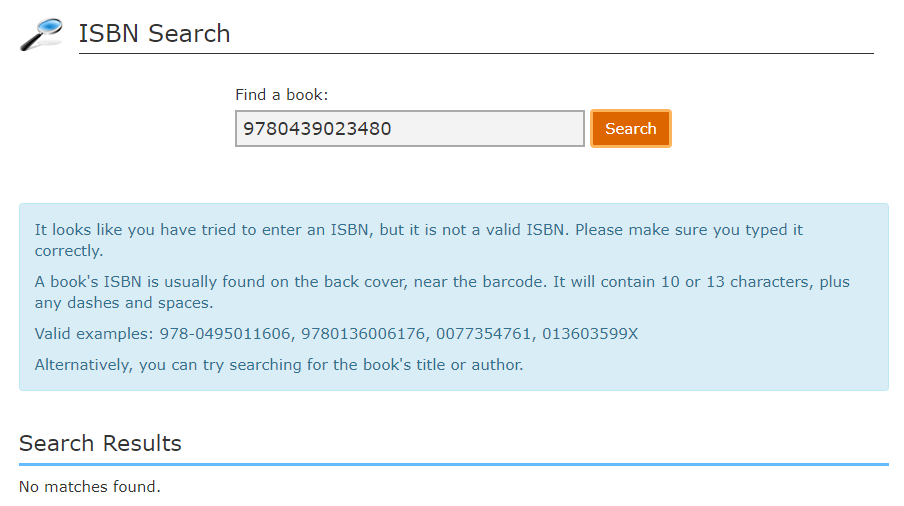

In [15]:
from IPython.display import Image
Image("C:/Users/User/Downloads/test2/isbn_invalid.png")

In [16]:
print('An example of valid isbn13 :', book.loc[valid_isbn13[0]]['isbn13'])

An example of valid isbn13 : 9780439554930.0


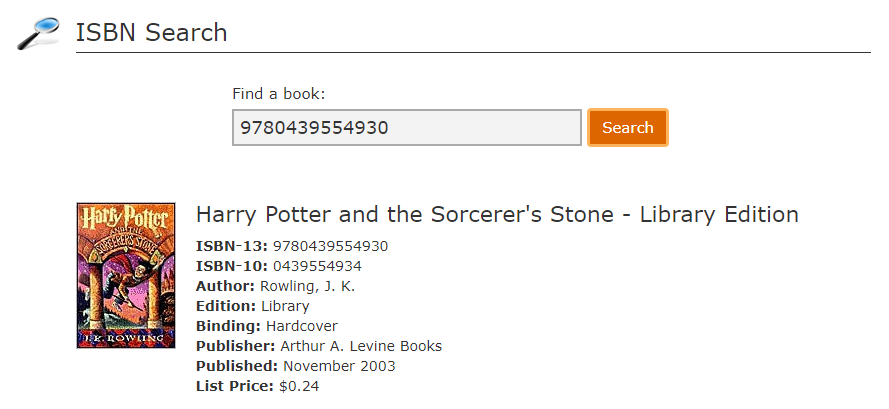

In [17]:
Image("C:/Users/User/Downloads/test2/isbn_valid.png")

### ✅ Checking outliers of work_ratings_count : Work_ratings_count must be the sum of ratings_1 to ratings_5

In [23]:
invalid_work_ratings_count = 0
for i in range(len(book)):
    if book.loc[i]['work_ratings_count'] != (book.loc[i]['ratings_1'] + book.loc[i]['ratings_2'] + 
                                             book.loc[i]['ratings_3'] + book.loc[i]['ratings_4'] + 
                                             book.loc[i]['ratings_5']):
        invalid_work_ratings_count += 1

<div style="color:red", align="justify"><h4>
📌 There isn't any outlier value in work_ratings_count column

In [24]:
invalid_work_ratings_count

0

<div style="", align="justify"><h3>
⚫ checking ratings dataset outliers
<hr style="border:1px solid gray">

In [37]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


### ✅ Checking outliers of book_id : Book_ids in rating dataset must be in range 1 to 10000

<div style="color:red", align="justify"><h4>
📌 There isn't any outlier value in book_id column

In [45]:
print('book_id differ from {} to {}'.format(rating['book_id'].min(), rating['book_id'].max()))

book_id differ from 1 to 10000


### ✅ Checking outliers of user_id : User_ids in rating dataset must be in range 1 to 53424

<div style="color:red", align="justify"><h4>
📌 There isn't any outlier value in user_id column

In [43]:
print('user_id differ from {} to {}'.format(rating['user_id'].min(), rating['user_id'].max()))

user_id differ from 1 to 53424


### ✅ Checking outliers of rating : Rating must be in range 1 to 5

<div style="color:red", align="justify"><h4>
📌 There isn't any outlier value in rating column

In [42]:
print('rating differ from {} to {}'.format(rating['rating'].min(), rating['rating'].max()))

rating differ from 1 to 5


<div style="", align="justify"><h3>
⚫ checking to_read dataset outliers
<hr style="border:1px solid gray">

In [39]:
to_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


### ✅ Checking outliers of book_id : Book_ids in to_read dataset must be in range 1 to 10000

<div style="color:red", align="justify"><h4>
📌 There isn't any outlier value in book_id column

In [46]:
print('book_id differ from {} to {}'.format(to_read['book_id'].min(), to_read['book_id'].max()))

book_id differ from 1 to 10000


### ✅ Checking outliers of user_id : User_ids in to_read dataset must be in range 1 to 53424

<div style="color:red", align="justify"><h4>
📌 There isn't any outlier value in user_id column

In [47]:
print('user_id differ from {} to {}'.format(to_read['user_id'].min(), to_read['user_id'].max()))

user_id differ from 1 to 53424


## 📑 Data cleaning

In [27]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

### ✅ Checking the missing values of book dataset

<div style="direction:rtl", align="justify"><h3>
<span style='font-family:"B Nazanin"'>
با توجه به اینکه متغیر های isbn و isnb13 شماره اشتراک بین المللی کتاب هستند به نوعی identifier بوده و به ازای هر کتاب مقدار منحصر به فرد دارند لذا در مدلسازی به کار نمی آیند اما با داشتن آن ها می توان سایر اطلاعات با اهمیت درباره کتاب ها را استخراج نمود. با داشتن isbn13 و کتابخانه pyisbn می توان به ازای رکورد هایی که حاوی مقدار نال برای ستون های سال چاپ و زبان هستند مقادیر معتبر نظیر این ستون ها را یافته و جایگذاری کرد. به علاوه ستون original_title نیز مورد استفاده ما در مدل سازی نمی باشد چرا که وجود title کافی است.


In [29]:
book.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

<div style="color:red;", align="justify" ><h4>
📌 isbn has 700, isbn13 has 585, original_publication_year has 21, original_title has 585 and language_code has 1084 null values.
<div style="color:green", align="justify"><h4>
✔️ We use isbntool and pyisbn to filling null values

https://pyisbn.readthedocs.io/en/latest/_modules/pyisbn.html

In [5]:
import sys
from isbntools.app import *
import pyisbn
import time

### ✅ Imputation and correct isbn13

<div style="direction:rtl", align="justify"><h3>
<span style='font-family:"B Nazanin"'>
تابع isbn_creator با بهره گیری از ابزار isbntools و کتابخانه pyisbn از روی نام نویسندگان و عنوان کتاب به کمک تابع آماده isb_from_words به isbn13 دست پیدا می کند و مقدار آن را در ستون متناظر قرار می دهیم. با توجه به حجم زیاد درخواست ها ممکن است عمل جستجو و resolve شماره اشتراک با موفقت همراه نباشد لذا اندیس نظیر رکورد هایی که مقدار isbn13 معتبر آن ها با موفقیت بدست نیامده است را درون لیست exception_isbn ذخیره کرده و در ادامه مجددا برای جستجوی آن ها تلاش خواهیم کرد. 

In [5]:
def isbn_creator(strat_indx, end_indx):
    exception_isbn = []
    for i in book[(book.book_id < end_indx) & (book.book_id >= strat_indx)].index:
        try:
            isbn13 = isbn_from_words(str(book.loc[i].title + ' ' + book.loc[i].authors))
            book.loc[i,'isbn13'] = isbn13
            time.sleep(0.2)
        except:
            exception_isbn.append(i)
            print(i, "Next entry")
    return exception_isbn

<div style="direction:rtl", align="justify"><h3>
<span style='font-family:"B Nazanin"'>
در این قسمت تابع second_isbn_creator لیستی از اندیس کتاب هایی که شماره اشتراک آن ها قبلا بدست نیامده بود را دریافت کرده و مجددا برای resolve آن ها تلاش می کند.

In [6]:
def second_isbn_creator(unavailables):
    exception_isbn = []
    for i in unavailables:
        try:
            isbn13 = isbn_from_words(str(book.loc[i].title + ' ' + book.loc[i].authors))
            book.loc[i,'isbn13'] = isbn13
            time.sleep(0.2)
        except:
            exception_isbn.append(i)
            print(i, "Next entry")
    return exception_isbn

<div style="direction:rtl", align="justify"><h3>
<span style='font-family:"B Nazanin"'>
به این ترتیب ابتدا isbn13 نظر تمام رکورد های دیتاست را با استفاده از تابع isbn_creator بدست می آوریم و خروجی این تابع لیستی از کتاب هایی است که عمل جستجوی isbn13 نظیر آن ها موفقیت آمیز نبوده است. در مراحل بعدی این لیست را به تابع second_isbn_creator داده و برای resolve مجدد آن ها تلاش می کنیم به دلیل تعداد request های زیاد این کار را تا چند مرحله تکرار می کنیم تا انجا که اطمینان یابیم تنها isbn13 هایی resolve نشده اند که از روی نام نویسنده و عنوان کتاب قابل جستجو نبوده اند. 

In [16]:
unavailables = []
for i in range(0, 10000, 500):
    exception_isbn = isbn_creator(i, i+501)
    for exc in exception_isbn:
        unavailables.append(exc)

print (len(unavailables), ' book is not available for getting isbn13')
print ('____________________________________________________________')
print (unavailables)

67  book is not available for getting isbn13
____________________________________________________________
[193, 395, 1178, 2024, 2811, 3145, 3296, 3505, 3527, 3655, 3753, 3864, 3907, 4008, 4044, 4070, 4164, 4204, 4325, 4393, 4412, 4466, 4514, 4516, 4733, 4764, 4809, 4874, 5171, 5232, 5265, 5325, 5390, 5947, 6063, 6096, 6134, 6199, 6233, 6254, 6255, 6256, 6257, 6259, 6261, 6263, 6366, 6528, 7393, 7503, 7718, 8083, 8342, 8379, 8408, 8919, 9084, 9142, 9327, 9371, 9386, 9521, 9666, 9690, 9766, 9771, 9961]


In [28]:
exception_isbn = second_isbn_creator(unavailables)

print (len(exception_isbn), ' book is not available for getting isbn13')
print ('____________________________________________________________')
print (exception_isbn)

12  book is not available for getting isbn13
____________________________________________________________
[193, 2811, 4044, 4412, 4733, 5171, 6096, 6134, 6233, 7503, 9690, 9766]


In [84]:
for i in range(0, 20):
    exception_isbn = second_isbn_creator(exception_isbn)
    
print (len(exception_isbn), ' book is not available for getting isbn13')
print ('____________________________________________________________')
print (exception_isbn)

0  book is not available for getting isbn13
____________________________________________________________
[]


In [161]:
book.to_csv(path + 'book_no_null.csv', index=False)

<div style="direction:rtl", align="justify">
در انتها دیتافریم حاوی isbn13 های معتبر را در دیتاست book_no_null.csv ذخیره سازی کرده و در گام های بعدی ازین دیتاست استفاده می نماییم.

### ✅ Check validity and remaining null in isbn13

<div style="direction:rtl", align="justify"> <h3>
<span style='font-family:"B Nazanin"'>
در ادامه به وسیله تابع validate_isbn که از تابع آماده validate موجود در کتابخانه pyisbn بهره می گیرد مقادیر isbn13 نظر تمام رکورد های دیتافریم مرحله قبل را اعتبار سنجی می کنیم و در صورتی که معتبر نباشند آن ها را در لیست IsInvalid و درصورتی که null باشند در لیست IsNull ذخیره سازی می کنیم. 

In [7]:
def validate_isbn(strat_indx, end_indx):
    IsNull = []
    IsInvalid = []
    for i in book[(book.book_id < end_indx) & (book.book_id >=strat_indx)].index:
        try:
            if pyisbn.validate(str(int(book.loc[i].isbn13))) != True:
                IsInvalid.append(i)
        except:
            IsNull.append(i)
            
    return (IsNull, IsInvalid)

<div style="direction:rtl", align="justify"> <h3>
<span style='font-family:"B Nazanin"'>
چنانچه request دریافت isbn13 موفقیت آمیز نباشد و به دلیل ترافیک بالا یا یافت نشدن   کتاب resolve نشود رشته تهی برگردانده می شود که نیاز است رکورد های حاوی این مقدار را ابتدا با NaN جایگذاری کرده و سپس عمل اعتبار سنجی isbn13 را انجام دهیم.

In [127]:
book['isbn13'].replace({'': np.nan}, inplace = True)

<div style="direction:rtl", align="justify"> <h3>
<span style='font-family:"B Nazanin"'>
لیست IsInvalid خالی است لذا تمام isbn13 های موجود یا معتبر یا Null هستند.

In [102]:
IsNull, IsInvalid = validate_isbn(0, 10000)
print (len(IsInvalid), ' isbn is not valid')
print ('____________________________________________________________')
print(IsInvalid)

0  isbn is not valid
____________________________________________________________
[]


<div style="direction:rtl", align="justify"> <h3>
<span style='font-family:"B Nazanin"'>
84 مورد کتاب در میان ده هزار کتاب وجود دارد که isbn13 آن ها Null بوده و در مراحل قبلی resolve نشده است.

In [103]:
print (len(IsNull), ' isbn is null')
print ('____________________________________________________________')
print(IsNull)

84  isbn is null
____________________________________________________________
[726, 1053, 1113, 1179, 1196, 1225, 1772, 1832, 1894, 2164, 2442, 2936, 3198, 3266, 3371, 3394, 3632, 3824, 4005, 4065, 4105, 4160, 4204, 4414, 4441, 4606, 4637, 4675, 4687, 4821, 4891, 4934, 5052, 5209, 5359, 5376, 5646, 5678, 5715, 5868, 6194, 6260, 6451, 6600, 6742, 7084, 7166, 7224, 7471, 7568, 7619, 7638, 7674, 7782, 7934, 8039, 8078, 8108, 8111, 8143, 8246, 8335, 8431, 8482, 8486, 8522, 8758, 8868, 8881, 8912, 9043, 9066, 9121, 9140, 9178, 9220, 9320, 9384, 9557, 9609, 9619, 9677, 9689, 9857]


<div style="direction:rtl", align="justify"> <h3>
<span style='font-family:"B Nazanin"'>
مجددا تلاش میکنیم isbn13 نظیر این 84 مورد کتاب باقی مانده را با دادن لیست حاوی اندیس آن ها به تابع second_isbn_creator بدست آوریم.

In [107]:
exception_isbn = second_isbn_creator(IsNull)

print (len(exception_isbn), ' book is not available for getting isbn13')
print ('____________________________________________________________')
print (exception_isbn)

1  book is not available for getting isbn13
____________________________________________________________
[4821]


In [116]:
book['isbn13'].replace({'': np.nan}, inplace = True)

In [129]:
IsNull, IsInvalid = validate_isbn(0, 10000)
print (len(IsInvalid), ' isbn is not valid')
print ('____________________________________________________________')
print(IsInvalid)

0  isbn is not valid
____________________________________________________________
[]


In [130]:
print (len(IsNull), ' isbn is null')
print ('____________________________________________________________')
print(IsNull)

76  isbn is null
____________________________________________________________
[726, 1053, 1113, 1179, 1225, 1832, 1894, 2164, 2442, 2936, 3198, 3371, 3394, 3824, 4005, 4065, 4105, 4160, 4204, 4414, 4441, 4606, 4637, 4675, 4687, 4821, 4891, 4934, 5052, 5209, 5359, 5376, 5646, 5678, 5715, 5868, 6194, 6260, 6451, 6600, 7084, 7166, 7224, 7471, 7568, 7619, 7638, 7674, 7782, 7934, 8039, 8078, 8108, 8111, 8143, 8246, 8335, 8431, 8482, 8486, 8522, 8758, 8868, 8881, 8912, 9043, 9066, 9121, 9140, 9178, 9320, 9384, 9609, 9619, 9677, 9857]


In [ ]:
book.to_csv(path + 'book_no_null.csv', index=False)

### ✅ Filling null values in original_publication_year

<div style="direction:rtl", align="justify"> <h3>
<span style='font-family:"B Nazanin"'>
در این قسمت ابتدا اندیس نظیر تمام کتاب هایی که سال چاپ آن ها نال است را پیدا میکنیم. در حالت کلی تعداد 21 کتاب سال چاپ Null دارند.

In [145]:
null_publication_year = book[book['original_publication_year'].isna()].index
print(null_publication_year)

Int64Index([ 219,  975, 3505, 4228, 4247, 4409, 4707, 4770, 4877, 5609, 5871,
            6428, 7190, 7215, 7416, 7645, 8476, 9196, 9510, 9533, 9928],
           dtype='int64')


<div style="direction:rtl", align="justify"> <h3>
<span style='font-family:"B Nazanin"'>
سپس با استفاده از isbn13 و تابع meta اطلاعات مربوط به این کتاب را استخراج کرده و فیلد Year آن را به عنوان سال چاپ استفاده می کنیم به علاوه در صورتی که سال چاپ از روی isbn13 و metadata های موحود قابل استخراج نباشد و یا احیانا isbn13 کتابی Null باشد آنگاه اندیس نظیر این کتاب ها که همچنان ستون سال چاپ آن ها نال باقی مانده درون لیست exception_original_publication_year ذخیره می شود تا در ادامه به نحوی دیگر سال چاپ نظیر این کتاب ها را استخراج کنیم..

In [185]:
exception_original_publication_year = []
for i in null_publication_year:
    try:
        json_response = meta(str(int(book.loc[i,'isbn13'])))
        book.loc[i,'original_publication_year'] = json_response['Year']
    except:
        exception_original_publication_year.append(i)

<div style="direction:rtl", align="justify"> <h3>
<span style='font-family:"B Nazanin"'>
پس از پر کردن مقادیر نال موجود تنها 4 کتاب باقی می ماند که یا isbn13 نظیر آن ها نال بوده و یا از روی isbn13 و metadata های موجود کتابخانه pyisbn نتوانسته سال چاپ کتاب را بدست آورد. که در ادامه این موارد را به صورتی دستی جستجو کرده و وارد دیتاست می کنیم. 

In [186]:
exception_original_publication_year

[975, 5871, 6428, 7190]

In [187]:
book['original_publication_year'].replace({'': np.nan}, inplace = True)

In [188]:
book[book['original_publication_year'].isna()].index

Int64Index([975, 5871, 6428, 7190, 9928], dtype='int64')

### ✅ Imputation of remaining null values in original_publication_year manually

In [4]:
book.loc[975,'original_publication_year'] = 1998

book.loc[5871,'original_publication_year'] = 2010

book.loc[6428,'original_publication_year'] = 2006

book.loc[7190,'original_publication_year'] = 2010

book.loc[9928,'original_publication_year'] = 1998

In [6]:
book.to_csv(path + 'book_no_null.csv', index=False)

### ✅ Filling null values in language_code

<div style="direction:rtl", align="justify"> <h3>
<span style='font-family:"B Nazanin"'>
در این قسمت ابتدا اندیس نظیر تمام کتاب هایی که زبان نظیر آن ها نال است را پیدا میکنیم. در حالت کلی تعداد 1084 کتاب زبان Null دارند.

In [8]:
null_language_code = book[book['language_code'].isna()].index
print(null_language_code)

Int64Index([  44,  131,  203,  236,  287,  320,  408,  412,  464,  486,
            ...
            9951, 9953, 9959, 9967, 9969, 9972, 9973, 9976, 9985, 9999],
           dtype='int64', length=1084)


<div style="direction:rtl", align="justify"> <h3>
<span style='font-family:"B Nazanin"'>
سپس با استفاده از isbn13 و تابع info اطلاعات مربوط به کشور کتاب ها را استخراج کرده به علاوه در صورتی که کشور مربوطه از روی isbn13 و info های موجود قابل استخراج نباشد و یا احیانا isbn13 کتابی Null باشد آنگاه اندیس نظیر این کتاب ها که همچنان ستون language آن ها نال باقی مانده درون لیست exception_language_code ذخیره می شود تا در ادامه به نحوی دیگر کشور و زبان نظیر این کتاب ها را استخراج کنیم..

In [9]:
book['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [10]:
exception_language_code = []
lan_code = []
for i in null_language_code:
    try:
        lan_response = info(str(int(book.loc[i,'isbn13'])))
        book.loc[i,'language_code'] = lan_response
        lan_code.append(lan_response)
    except:
        exception_language_code.append(i)

In [13]:
def unique(list1):
    
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [14]:
unique(lan_code)

['English language',
 "China, People's Republic",
 'United States',
 'Turkey',
 'Sweden',
 'German language',
 'India',
 'Finland',
 'French language',
 'Japan',
 'Argentina']

In [15]:
book['language_code'].replace({  'English language':'eng',
                                 "China, People's Republic":'chi',
                                 'United States':'en-US',
                                 'Turkey':'tur',
                                 'Sweden':'swe',
                                 'German language':'ger',
                                 'India':'hin',
                                 'Finland':'fin',
                                 'French language':'fre',
                                 'Japan':'jpn',
                                 'Argentina': 'es-ar'
                                }, inplace = True)

<div style="direction:rtl", align="justify"> <h3>
<span style='font-family:"B Nazanin"'>
پس از پر کردن مقادیر نال موجود تنها 4 کتاب باقی می ماند که یا isbn13 نظیر آن ها نال بوده و یا از روی isbn13 و info های موجود کتابخانه pyisbn نتوانسته کشور و زبان مربوطه را بدست آورد. که در ادامه این موارد را به صورتی دستی جستجو کرده و وارد دیتاست می کنیم. 

In [4]:
exception_language_code

[1053, 2164, 5376, 9677]


In [3]:
book['language_code'].replace({'': np.nan}, inplace = True)

In [17]:
book[book['language_code'].isna()].index

Int64Index([1053, 2164, 5376, 9677], dtype='int64')

### ✅ Imputation of remaining null values in language_code manually

In [7]:
book.loc[1053,'language_code'] = 'eng'

book.loc[2164,'language_code'] = 'eng'

book.loc[5376,'language_code'] = 'fre'

book.loc[9677,'language_code'] = 'eng'

In [8]:
book.to_csv(path + 'book_no_null.csv', index=False)

### ✅ Change eng,en-GB,en-CA,en-US to en

In [10]:
book.language_code = book.language_code.replace(['eng','en-CA','en-GB','en-US'],'en')

In [11]:
book['language_code'].unique()

array(['en', 'spa', 'fre', 'nl', 'ara', 'por', 'ger', 'nor', 'chi', 'jpn',
       'vie', 'ind', 'pol', 'tur', 'swe', 'dan', 'fil', 'ita', 'per',
       'hin', 'fin', 'es-ar', 'rum', 'mul', 'rus'], dtype=object)

In [12]:
book.to_csv('book_no_null_language_merging.csv', index=False)

In [13]:
book.isna().sum()

book_id                        0
goodreads_book_id              0
best_book_id                   0
work_id                        0
books_count                    0
isbn                         700
isbn13                        76
authors                        0
original_publication_year      0
original_title               585
title                          0
language_code                  0
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64